In [97]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend as K
tf.compat.v1.experimental.output_all_intermediates(True)

In [98]:
tf.random.set_seed(36)

## Dataset

In [99]:
BASE_DIR_PATH = '../Datasets'
DATASET_FILE = os.path.join(BASE_DIR_PATH, '2016_2017_sto_nino_and_montalban_lag_1.csv')

In [100]:
df = pd.read_csv(DATASET_FILE)
df

,Unnamed: 0,Unnamed: 0.1,datetime,month,day,hour,t,Station,x,Rainfall_Aries,...,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope,Prev_Waterlevel
0,0,0,2016-01-01 00:00:00,1,1,0,0.0,Montalban,0,0,...,2,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000,NaN
1,1,1,2016-01-01 00:00:00,1,1,0,0.0,Sto_Nino,14420,0,...,2,0,0,12.18,21.033407,803.88,0.026165,0.033,0.000667,NaN
2,2,2,2016-01-01 01:00:00,1,1,1,3600.0,Montalban,0,0,...,1,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000,21.03
3,3,3,2016-01-01 01:00:00,1,1,1,3600.0,Sto_Nino,14420,0,...,1,1,0,12.19,21.280072,804.54,0.026450,0.033,0.000667,12.18
4,4,4,2016-01-01 02:00:00,1,1,2,7200.0,Montalban,0,1,...,1,0,1,21.03,14.842428,630.90,0.023526,0.035,0.002000,21.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,35035,2017-12-31 21:00:00,12,31,21,63147600.0,Sto_Nino,14420,0,...,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667,12.44
35036,35036,35036,2017-12-31 22:00:00,12,31,22,63151200.0,Montalban,0,0,...,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000,21.18
35037,35037,35037,2017-12-31 22:00:00,12,31,22,63151200.0,Sto_Nino,14420,0,...,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667,12.44
35038,35038,35038,2017-12-31 23:00:00,12,31,23,63154800.0,Montalban,0,0,...,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000,21.18


In [101]:
df = df[['month', 'day', 'hour', 'Station', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'Prev_Waterlevel', 'Waterlevel']]
df

,month,day,hour,Station,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Prev_Waterlevel,Waterlevel
0,1,1,0,Montalban,0,1,2,0,0,NaN,21.03
1,1,1,0,Sto_Nino,0,1,2,0,0,NaN,12.18
2,1,1,1,Montalban,0,1,1,1,0,21.03,21.03
3,1,1,1,Sto_Nino,0,1,1,1,0,12.18,12.19
4,1,1,2,Montalban,1,1,1,0,1,21.03,21.03
...,...,...,...,...,...,...,...,...,...,...,...
35035,12,31,21,Sto_Nino,0,0,0,0,0,12.44,12.44
35036,12,31,22,Montalban,0,0,0,0,0,21.18,21.18
35037,12,31,22,Sto_Nino,0,0,0,0,0,12.44,12.44
35038,12,31,23,Montalban,0,0,0,0,0,21.18,21.18


In [102]:
df['Station'] = [1 if x == 'Sto_Nino' else 0 for x in df['Station']]
df

<ipython-input-102-7b57490d9416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Station'] = [1 if x == 'Sto_Nino' else 0 for x in df['Station']]


,month,day,hour,Station,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Prev_Waterlevel,Waterlevel
0,1,1,0,0,0,1,2,0,0,NaN,21.03
1,1,1,0,1,0,1,2,0,0,NaN,12.18
2,1,1,1,0,0,1,1,1,0,21.03,21.03
3,1,1,1,1,0,1,1,1,0,12.18,12.19
4,1,1,2,0,1,1,1,0,1,21.03,21.03
...,...,...,...,...,...,...,...,...,...,...,...
35035,12,31,21,1,0,0,0,0,0,12.44,12.44
35036,12,31,22,0,0,0,0,0,0,21.18,21.18
35037,12,31,22,1,0,0,0,0,0,12.44,12.44
35038,12,31,23,0,0,0,0,0,0,21.18,21.18


In [103]:
X_data = df.drop(columns='Waterlevel')
X_data = X_data.values
y_data = df['Waterlevel']
y_data = y_data.values

In [104]:
X_data

array([[ 1.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,   nan],
       [ 1.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,   nan],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  0.  , 21.03],
       ...,
       [12.  , 31.  , 22.  , ...,  0.  ,  0.  , 12.44],
       [12.  , 31.  , 23.  , ...,  0.  ,  0.  , 21.18],
       [12.  , 31.  , 23.  , ...,  0.  ,  0.  , 12.44]])

In [105]:
y_data

array([21.03, 12.18, 21.03, ..., 12.44, 21.18, 12.44])

In [106]:
n = len(df)

In [107]:
X_train, y_train = X_data[:int(0.5*n)], y_data[:int(0.5*n)]
X_val, y_val = X_data[int(0.5*n):int(0.75*n)], y_data[int(0.5*n):int(0.75*n)]
X_test, y_test = X_data[int(0.75*n):], y_data[int(0.75*n):]

In [108]:
X_train.shape

(17520, 10)

In [109]:
X_train = X_train[2:]
y_train = y_train[2:]

X_train.shape

(17518, 10)

In [110]:
X_train

array([[ 1.  ,  1.  ,  1.  , ...,  1.  ,  0.  , 21.03],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  0.  , 12.18],
       [ 1.  ,  1.  ,  2.  , ...,  0.  ,  1.  , 21.03],
       ...,
       [12.  , 31.  , 22.  , ...,  0.  ,  0.  , 12.53],
       [12.  , 31.  , 23.  , ...,  0.  ,  0.  , 21.31],
       [12.  , 31.  , 23.  , ...,  0.  ,  0.  , 12.53]])

In [111]:
X_val.shape

(8760, 10)

In [112]:
X_test.shape

(8760, 10)

## Evaluation Metrics

In [113]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [114]:
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Models and Training Loops

In [115]:
def create_train_dnn_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    # Create the model
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return model, history

In [116]:
def create_train_cnn_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    # Reshape input for 1D CNN
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    
    conv_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.Conv1D(filters=64, kernel_size=6, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    conv_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    conv_history = conv_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return conv_model, conv_history

In [117]:
def create_train_lstm_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    if len(X_train.shape) == 2:
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    if len(X_val.shape) == 2:
        X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
            
    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
        tf.keras.layers.Flatten(),  # Add Flatten layer to handle dimension mismatch
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    lstm_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    lstm_history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return lstm_model, lstm_history

## Training

In [118]:
dnn_model, dnn_history = create_train_dnn_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 2s 3ms/step - loss: 7.5697 - mean_squared_error: 7.5697 - NSE: 0.5982 - r_square: 0.9038 - val_loss: 0.0475 - val_mean_squared_error: 0.0475 - val_NSE: 0.9977 - val_r_square: 0.9981
Epoch 2/20
548/548 [==============================] - 1s 2ms/step - loss: 0.0910 - mean_squared_error: 0.0910 - NSE: 0.9951 - r_square: 0.9958 - val_loss: 0.0213 - val_mean_squared_error: 0.0213 - val_NSE: 0.9990 - val_r_square: 0.9992
Epoch 3/20
548/548 [==============================] - 1s 2ms/step - loss: 0.0786 - mean_squared_error: 0.0786 - NSE: 0.9958 - r_square: 0.9965 - val_loss: 0.0166 - val_mean_squared_error: 0.0166 - val_NSE: 0.9992 - val_r_square: 0.9993
Epoch 4/20
548/548 [==============================] - 1s 2ms/step - loss: 0.0762 - mean_squared_error: 0.0762 - NSE: 0.9960 - r_square: 0.9967 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_NSE: 0.9991 - val_r_square: 0.9992
Epoch 5/20
548/548 [==============================] - 1s

In [119]:
cnn_model, cnn_history = create_train_cnn_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 2s 2ms/step - loss: 21.6320 - mean_squared_error: 21.6320 - NSE: -0.1541 - r_square: 0.5855 - val_loss: 0.9016 - val_mean_squared_error: 0.9016 - val_NSE: 0.9557 - val_r_square: 0.9691
Epoch 2/20
548/548 [==============================] - 1s 2ms/step - loss: 1.0886 - mean_squared_error: 1.0886 - NSE: 0.9420 - r_square: 0.9485 - val_loss: 0.7211 - val_mean_squared_error: 0.7211 - val_NSE: 0.9646 - val_r_square: 0.9777
Epoch 3/20
548/548 [==============================] - 1s 2ms/step - loss: 0.8242 - mean_squared_error: 0.8242 - NSE: 0.9562 - r_square: 0.9618 - val_loss: 0.4917 - val_mean_squared_error: 0.4917 - val_NSE: 0.9758 - val_r_square: 0.9838
Epoch 4/20
548/548 [==============================] - 1s 2ms/step - loss: 0.6341 - mean_squared_error: 0.6341 - NSE: 0.9663 - r_square: 0.9708 - val_loss: 0.3487 - val_mean_squared_error: 0.3487 - val_NSE: 0.9828 - val_r_square: 0.9894
Epoch 5/20
548/548 [==============================] -

In [120]:
# Train the model
lstm_model, lstm_history = create_train_lstm_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 4s 4ms/step - loss: 20.1949 - mean_squared_error: 20.1949 - NSE: -0.0788 - r_square: 0.8315 - val_loss: 0.1107 - val_mean_squared_error: 0.1107 - val_NSE: 0.9945 - val_r_square: 0.9972
Epoch 2/20
548/548 [==============================] - 1s 3ms/step - loss: 0.1455 - mean_squared_error: 0.1455 - NSE: 0.9923 - r_square: 0.9933 - val_loss: 0.1006 - val_mean_squared_error: 0.1006 - val_NSE: 0.9950 - val_r_square: 0.9984
Epoch 3/20
548/548 [==============================] - 2s 3ms/step - loss: 0.1073 - mean_squared_error: 0.1073 - NSE: 0.9943 - r_square: 0.9951 - val_loss: 0.0438 - val_mean_squared_error: 0.0438 - val_NSE: 0.9979 - val_r_square: 0.9989
Epoch 4/20
548/548 [==============================] - 2s 3ms/step - loss: 0.1076 - mean_squared_error: 0.1076 - NSE: 0.9944 - r_square: 0.9954 - val_loss: 0.0457 - val_mean_squared_error: 0.0457 - val_NSE: 0.9978 - val_r_square: 0.9992
Epoch 5/20
548/548 [==============================] -

## Predictions

In [121]:
X_test

array([[ 7.  ,  2.  , 12.  , ...,  0.  ,  0.  , 21.27],
       [ 7.  ,  2.  , 12.  , ...,  0.  ,  0.  , 11.91],
       [ 7.  ,  2.  , 13.  , ...,  0.  ,  0.  , 21.26],
       ...,
       [12.  , 31.  , 22.  , ...,  0.  ,  0.  , 12.44],
       [12.  , 31.  , 23.  , ...,  0.  ,  0.  , 21.18],
       [12.  , 31.  , 23.  , ...,  0.  ,  0.  , 12.44]])

In [122]:
X_test.shape

(8760, 10)

In [123]:
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_test_lstm

array([[[ 7.  ,  2.  , 12.  , ...,  0.  ,  0.  , 21.27]],

       [[ 7.  ,  2.  , 12.  , ...,  0.  ,  0.  , 11.91]],

       [[ 7.  ,  2.  , 13.  , ...,  0.  ,  0.  , 21.26]],

       ...,

       [[12.  , 31.  , 22.  , ...,  0.  ,  0.  , 12.44]],

       [[12.  , 31.  , 23.  , ...,  0.  ,  0.  , 21.18]],

       [[12.  , 31.  , 23.  , ...,  0.  ,  0.  , 12.44]]])

In [124]:
X_test_lstm.shape

(8760, 1, 10)

In [125]:
predictions = lstm_model(X_test_lstm)
predictions

<tf.Tensor: shape=(8760, 1), dtype=float32, numpy=
array([[21.185211],
       [11.96773 ],
       [21.171818],
       ...,
       [12.379572],
       [21.039078],
       [12.357152]], dtype=float32)>

In [126]:
predictions = np.array(predictions).reshape(-1)
predictions.shape

(8760,)

In [127]:
y_test, y_test.shape

(array([21.26, 11.89, 21.26, ..., 12.44, 21.18, 12.44]), (8760,))

In [128]:
sto_nino_test = y_test[1::2]
sto_nino_test

array([11.89, 11.87, 11.85, ..., 12.44, 12.44, 12.44])

In [129]:
sto_nino_pred = predictions[1::2]
sto_nino_pred

array([11.96773 , 11.963412, 11.960805, ..., 12.398548, 12.379572,
       12.357152], dtype=float32)

In [130]:
SS_res = np.sum(np.square(sto_nino_test - sto_nino_pred)) 
SS_tot = np.sum(np.square(sto_nino_test - np.mean(sto_nino_test))) 

sto_nino_nse =  1 - SS_res/SS_tot
sto_nino_nse

0.8678847310750862

In [131]:
sto_nino_mse = np.mean(np.square(sto_nino_test-sto_nino_pred))
sto_nino_mse

0.04101902683531083

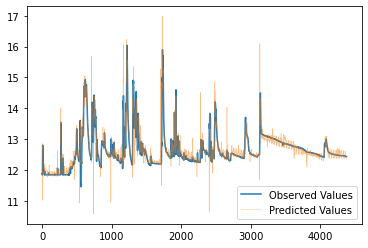

In [132]:
plt.plot(sto_nino_test, label='Observed Values')
plt.plot(sto_nino_pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

In [133]:
montalban_test = y_test[::2]
montalban_test

array([21.26, 21.26, 21.25, ..., 21.18, 21.18, 21.18])

In [134]:
montalban_pred = predictions[::2]
montalban_pred

array([21.185211, 21.171818, 21.17768 , ..., 21.098604, 21.068882,
       21.039078], dtype=float32)

In [135]:
SS_res = np.sum(np.square(montalban_test - montalban_pred)) 
SS_tot = np.sum(np.square(montalban_test - np.mean(montalban_test))) 

montalban_nse =  1 - SS_res/SS_tot
montalban_nse

0.6674313858054621

In [136]:
montalban_mse = np.mean(np.square(montalban_test-montalban_pred))
montalban_mse

0.10112858329324129

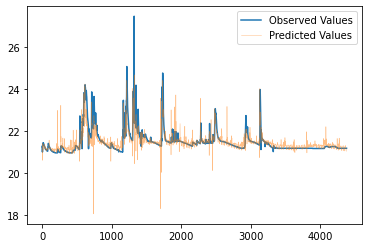

In [137]:
plt.plot(montalban_test, label='Observed Values')
plt.plot(montalban_pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

In [138]:
mse = (sto_nino_mse + montalban_mse)/2
nse = (sto_nino_nse + montalban_nse)/2

mse, nse

(0.07107380506427606, 0.7676580584402741)

In [139]:
np.savetxt('results/no_window_lag1_sto_nino.csv', sto_nino_pred, delimiter=',', fmt='%.4f')

In [140]:
np.savetxt('results/no_window_lag1_montalban.csv', montalban_pred, delimiter=',', fmt='%.4f')

## Feature Selection Sto Nino

In [40]:
import random
SEED = 36
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [152]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [169]:
X_train_lstm.shape

(17518, 1, 10)

In [153]:
X_train_lstm.shape

(17518, 1, 10)

In [154]:
X_train_lstm_sto_nino = X_train_lstm[1::2, :, :]
X_test_lstm_sto_nino = X_test_lstm[1::2, :, :]

In [156]:
print(X_train_lstm_sto_nino.shape)
print(X_test_lstm_sto_nino.shape)


(8759, 1, 10)
(4380, 1, 10)


In [170]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# For consistency with the window LSTM (get 1600 samples for train/test)

train_data_sto_nino = X_train_lstm_sto_nino[:1600]
train_data_flat_sto_nino = train_data_sto_nino.reshape(train_data_sto_nino.shape[0], -1)

test_data_sto_nino = X_test_lstm_sto_nino[:1600]
test_data_flat_sto_nino = test_data_sto_nino.reshape(test_data_sto_nino.shape[0], -1)

# Prediction function that returns a single value (last time step of water level)
def predict_last_step(X):
    # Reshape back to 3D
    batch_size = X.shape[0]
    time_steps = 1
    features = X_train_lstm.shape[-1]
    
    X_reshaped = X.reshape(batch_size, time_steps, features)
    
    # Get model predictions
    preds = lstm_model.predict(X_reshaped, verbose=0)
    
    # Return the last time step prediction for water level
    return preds[:, 0]  # Last time step, first feature (water level)

# Create the explainer using training data as background
explainer_sto_nino = shap.Explainer(predict_last_step, train_data_flat_sto_nino)  

# Calculate SHAP values for all test samples
shap_values_sto_nino = explainer_sto_nino(test_data_flat_sto_nino)  # Directly call explainer on test data

# Extract the SHAP values
shap_values_array_sto_nino = shap_values_sto_nino.values  # Get the actual SHAP values



ExactExplainer explainer: 1601it [13:37,  1.94it/s]                                                                    


In [166]:
shap_values_array_sto_nino.shape

(32, 10)

In [173]:
df.columns

Index(['month', 'day', 'hour', 'Station', 'Rainfall_Aries', 'Rainfall_Boso',
       'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro',
       'Prev_Waterlevel', 'Waterlevel'],
      dtype='object')

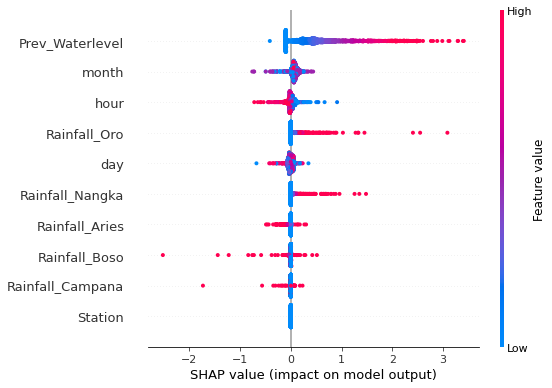

In [186]:
# Get feature names
feature_names  = df.columns[df.columns != 'Waterlevel'].tolist()

# Create the summary plot with proper feature names
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_sto_nino, test_data_flat_sto_nino, feature_names=feature_names)

In [187]:
shap_values_array_sto_nino

array([[ 0.02313319,  0.02232958, -0.02151509, ...,  0.        ,
         0.        , -0.04801585],
       [ 0.02589719,  0.02628849, -0.01453318, ...,  0.        ,
         0.        , -0.06605977],
       [ 0.02717182,  0.03076462, -0.00478133, ...,  0.        ,
         0.        , -0.08419018],
       ...,
       [ 0.04205725, -0.04131675,  0.04824336, ...,  0.        ,
         0.        ,  0.23228241],
       [ 0.05496547, -0.04278583,  0.0426321 , ...,  0.        ,
         0.        ,  0.23184265],
       [ 0.06726171, -0.04231875,  0.03824112, ...,  0.        ,
         0.        ,  0.23172099]])

In [188]:
feature_names

['month',
 'day',
 'hour',
 'Station',
 'Rainfall_Aries',
 'Rainfall_Boso',
 'Rainfall_Campana',
 'Rainfall_Nangka',
 'Rainfall_Oro',
 'Prev_Waterlevel']

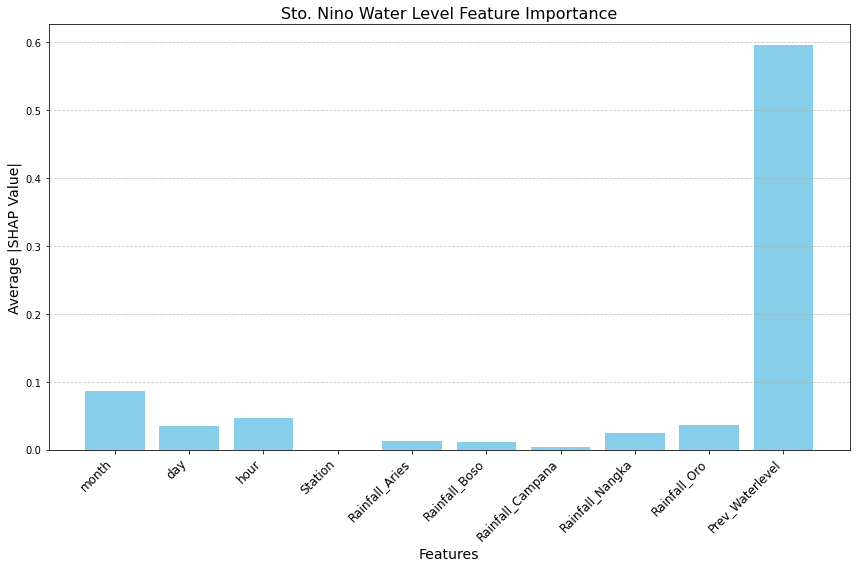

In [190]:
import numpy as np
import matplotlib.pyplot as plt


# Aggregate SHAP values across samples (mean absolute impact per feature)
shap_feature_importance_sto_nino = np.mean(np.abs(shap_values_array_sto_nino), axis=0)  

plt.figure(figsize=(12, 8))
bars = plt.bar(feature_names, shap_feature_importance_sto_nino, color='skyblue')
plt.title('Sto. Nino Water Level Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Average |SHAP Value|', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()


# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



In [191]:
import pandas as pd

# Create DataFrame with feature names and their importance values
shap_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_feature_importance_sto_nino
})

# Sort by importance value in descending order
shap_importance_df = shap_importance_df.sort_values('Importance', ascending=False)

# Reset index for cleaner display
shap_importance_df = shap_importance_df.reset_index(drop=True)

# Format the importance values to be more readable (optional)
shap_importance_df['Importance'] = shap_importance_df['Importance'].round(6)

# Display the DataFrame
shap_importance_df

,Feature,Importance
0,Prev_Waterlevel,0.596768
1,month,0.085807
2,hour,0.046555
3,Rainfall_Oro,0.036321
4,day,0.035223
5,Rainfall_Nangka,0.025092
6,Rainfall_Aries,0.012132
7,Rainfall_Boso,0.010881
8,Rainfall_Campana,0.004365
9,Station,0.000000


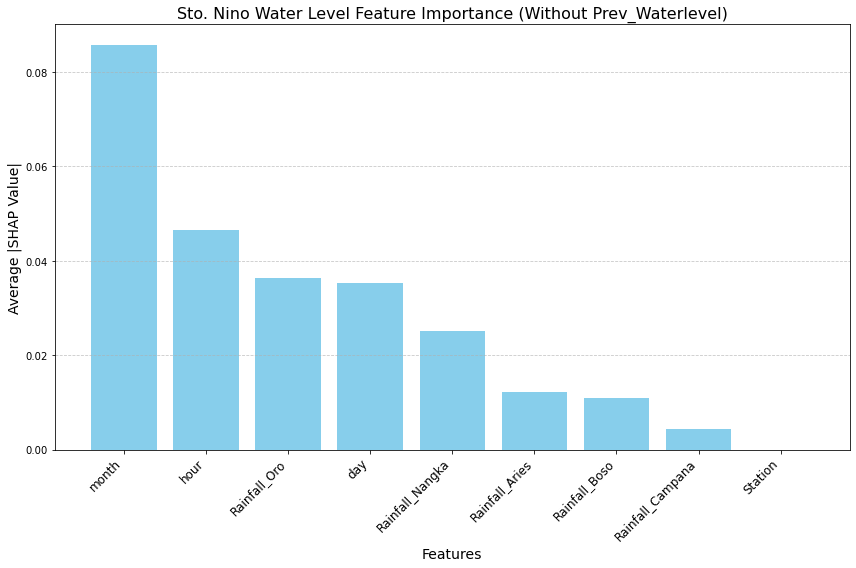

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Exclude 'Prev_Waterlevel' from feature names and corresponding SHAP values
filtered_indices = [i for i, name in enumerate(feature_names) if name != 'Prev_Waterlevel']
filtered_feature_names = [feature_names[i] for i in filtered_indices]
filtered_shap_importance = shap_feature_importance_sto_nino[filtered_indices]

# Sort by descending SHAP importance
sorted_indices = np.argsort(filtered_shap_importance)[::-1]  # Descending order
sorted_feature_names = [filtered_feature_names[i] for i in sorted_indices]
sorted_shap_importance = filtered_shap_importance[sorted_indices]

# Plot the sorted bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_feature_names, sorted_shap_importance, color='skyblue')
plt.title('Sto. Nino Water Level Feature Importance (Without Prev_Waterlevel)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Average |SHAP Value|', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



In [195]:
sorted_shap_importance

array([0.08580665, 0.04655525, 0.03632073, 0.03522255, 0.0250924 ,
       0.01213181, 0.01088092, 0.00436487, 0.        ])

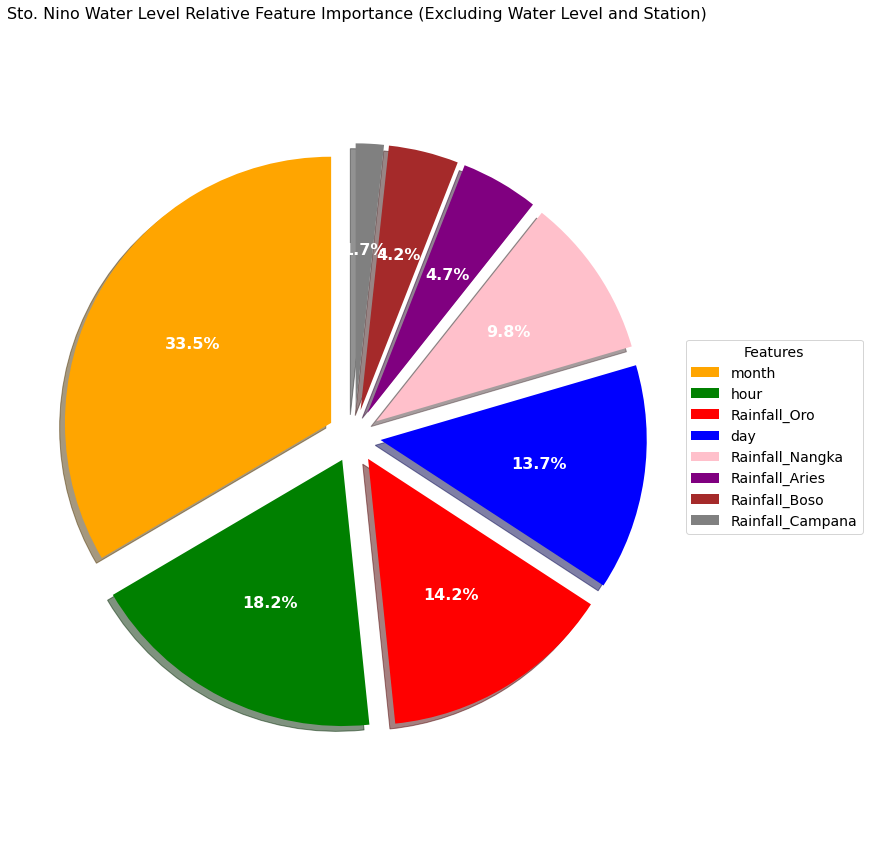

In [201]:
import numpy as np
import matplotlib.pyplot as plt


# Filter out features with zero importance
non_zero_indices_sto_nino = [i for i, x in enumerate(sorted_shap_importance) if x > 0]
non_zero_features_sto_nino = [sorted_feature_names[i] for i in non_zero_indices_sto_nino]
non_zero_importance_sto_nino = [sorted_shap_importance[i] for i in non_zero_indices_sto_nino]

# Normalize SHAP values to sum to 1
normalized_shap_importance = [x / sum(non_zero_importance_sto_nino) for x in non_zero_importance_sto_nino]

feature_colors = {
    "day": "blue",
    "month": "orange",
    "hour": "green",
    "Rainfall_Oro": "red",
    "Rainfall_Aries": "purple",
    "Rainfall_Boso": "brown",
    "Rainfall_Nangka": "pink",
    "Rainfall_Campana": "gray"
}

colors = [feature_colors.get(feat, "C0") for feat in non_zero_features_sto_nino]  # Default to 'C0' if not in the dictionary

# Recreate pie chart with normalized values (zero values removed)
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(
    normalized_shap_importance,  # Use normalized values
    labels=None,  
    autopct='%1.1f%%',
    startangle=90, 
    shadow=True, 
    explode=[0.1]*len(normalized_shap_importance),
    textprops={'fontsize': 16},
    colors=colors  # Apply the custom colors
)
# Enhance text visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
# Add legend
plt.legend(
    wedges, 
    non_zero_features_sto_nino,  # Now using filtered features list
    title="Features",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    title_fontsize=14,  # Increase legend title font size
    prop={'size': 14}  # Increase legend text font size
)
plt.axis('equal')  
plt.title('Sto. Nino Water Level Relative Feature Importance (Excluding Water Level and Station)', fontsize=16)
plt.tight_layout()
plt.show()

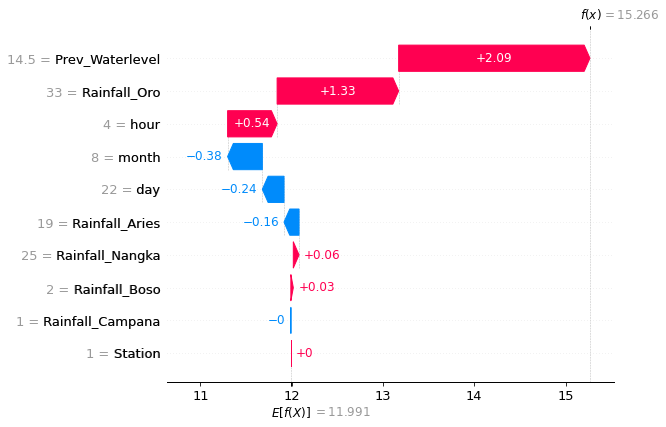

In [203]:
import shap

# Select a specific test sample (e.g., first instance)
sample_idx = 1216
shap_single_sto_nino = shap_values_sto_nino[sample_idx]  # Extract SHAP values for one instance


# Create SHAP waterfall plot for the chosen instance
shap.waterfall_plot(shap.Explanation(values=shap_single_sto_nino.values,  
                                     base_values=shap_single_sto_nino.base_values,  
                                     data=test_data_flat_sto_nino[sample_idx],  
                                     feature_names=feature_names))


## Feature Selection Montalban

In [212]:
import random
SEED = 36
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [213]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [214]:
X_train_lstm.shape

(17518, 1, 10)

In [215]:
X_train_lstm.shape

(17518, 1, 10)

In [216]:
X_train_lstm_montalban = X_train_lstm[0::2, :, :]
X_test_lstm_montalban = X_test_lstm[0::2, :, :]

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# For consistency with the window LSTM (get 1600 samples for train/test)

train_data_montalban = X_train_lstm_montalban[:1600]
train_data_flat_montalban = train_data_montalban.reshape(train_data_montalban.shape[0], -1)

test_data_montalban = X_test_lstm_montalban[:1600]
test_data_flat_montalban = test_data_montalban.reshape(test_data_montalban.shape[0], -1)

# Prediction function that returns a single value (last time step of water level)
def predict_last_step(X):
    # Reshape back to 3D
    batch_size = X.shape[0]
    time_steps = 1
    features = X_train_lstm.shape[-1]
    
    X_reshaped = X.reshape(batch_size, time_steps, features)
    
    # Get model predictions
    preds = lstm_model.predict(X_reshaped, verbose=0)
    
    # Return the last time step prediction for water level
    return preds[:, 0]  # Last time step, first feature (water level)

# Create the explainer using training data as background
explainer_montalban = shap.Explainer(predict_last_step, train_data_flat_montalban)  

# Calculate SHAP values for all test samples
shap_values_montalban = explainer_montalban(test_data_flat_montalban)  # Directly call explainer on test data

# Extract the SHAP values
shap_values_array_montalban = shap_values_montalban.values  # Get the actual SHAP values



ExactExplainer explainer:  94%|████████████████████████████████████████████████▉   | 1506/1600 [12:55<00:38,  2.43it/s]

In [ ]:
shap_values_array_montalban.shape

In [ ]:
df.columns

In [ ]:
# Get feature names
feature_names  = df.columns[df.columns != 'Waterlevel'].tolist()

# Create the summary plot with proper feature names
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_montalban, test_data_flat_montalban, feature_names=feature_names)

In [ ]:
shap_values_array_montalban

In [ ]:
feature_names

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Aggregate SHAP values across samples (mean absolute impact per feature)
shap_feature_importance_montalban = np.mean(np.abs(shap_values_array_montalban), axis=0)  

plt.figure(figsize=(12, 8))
bars = plt.bar(feature_names, shap_feature_importance_montalban, color='skyblue')
plt.title('Montalban Water Level Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Average |SHAP Value|', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()


# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



In [ ]:
import pandas as pd

# Create DataFrame with feature names and their importance values
shap_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_feature_importance_montalban
})

# Sort by importance value in descending order
shap_importance_df = shap_importance_df.sort_values('Importance', ascending=False)

# Reset index for cleaner display
shap_importance_df = shap_importance_df.reset_index(drop=True)

# Format the importance values to be more readable (optional)
shap_importance_df['Importance'] = shap_importance_df['Importance'].round(6)

# Display the DataFrame
shap_importance_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exclude 'Prev_Waterlevel' from feature names and corresponding SHAP values
filtered_indices_montalban = [i for i, name in enumerate(feature_names) if name != 'Prev_Waterlevel']
filtered_feature_names_montalban = [feature_names[i] for i in filtered_indices_montalban]
filtered_shap_importance_montalban = shap_feature_importance_montalban[filtered_indices_montalban]

# Sort by descending SHAP importance
sorted_indices_montalban = np.argsort(filtered_shap_importance_montalban)[::-1]  # Descending order
sorted_feature_names_montalban = [filtered_feature_names_montalban[i] for i in sorted_indices_montalban]
sorted_shap_importance_montalban = filtered_shap_importance_montalban[sorted_indices_montalban]

# Plot the sorted bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_feature_names_montalban, sorted_shap_importance_montalban, color='skyblue')
plt.title('Montalban Water Level Feature Importance (Without Prev_Waterlevel)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Average |SHAP Value|', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



In [ ]:
sorted_shap_importance_montalban

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Filter out features with zero importance
non_zero_indices_montalban = [i for i, x in enumerate(sorted_shap_importance_montalban) if x > 0]
non_zero_features_montalban = [sorted_feature_names[i] for i in non_zero_indices_montalban]
non_zero_importance_montalban = [sorted_shap_importance[i] for i in non_zero_indices_montalban]

# Normalize SHAP values to sum to 1
normalized_shap_importance_montalban = [x / sum(non_zero_importance_montalban) for x in non_zero_importance_montalban]

feature_colors = {
    "day": "blue",
    "month": "orange",
    "hour": "green",
    "Rainfall_Oro": "red",
    "Rainfall_Aries": "purple",
    "Rainfall_Boso": "brown",
    "Rainfall_Nangka": "pink",
    "Rainfall_Campana": "gray"
}

colors = [feature_colors.get(feat, "C0") for feat in non_zero_features_montalban]  # Default to 'C0' if not in the dictionary

# Recreate pie chart with normalized values (zero values removed)
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(
    normalized_shap_importance_montalban,  # Use normalized values
    labels=None,  
    autopct='%1.1f%%',
    startangle=90, 
    shadow=True, 
    explode=[0.1]*len(normalized_shap_importance_montalban),
    textprops={'fontsize': 16},
    colors=colors  # Apply the custom colors
)
# Enhance text visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
# Add legend
plt.legend(
    wedges, 
    non_zero_features_sto_nino_montalban,  # Now using filtered features list
    title="Features",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    title_fontsize=14,  # Increase legend title font size
    prop={'size': 14}  # Increase legend text font size
)
plt.axis('equal')  
plt.title('Montalban Water Level Relative Feature Importance (Excluding Water Level and Station)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import shap

# Select a specific test sample (e.g., first instance)
sample_idx = 1216
shap_single_montalban = shap_values_montalban[sample_idx]  # Extract SHAP values for one instance


# Create SHAP waterfall plot for the chosen instance
shap.waterfall_plot(shap.Explanation(values=shap_single_montalban.values,  
                                     base_values=shap_single_montalban.base_values,  
                                     data=test_data_flat_montalban[sample_idx],  
                                     feature_names=feature_names))
